In [73]:
# FILE:    scrambles.py
# PURPOSE: Simulate scrambled discrete sampling from a bowl of marbles
# AUTHOR:  Mick de Neeve <mick@live.nl>
# DATE:    April 8, 2025


import random
import matplotlib.colors as clr
import matplotlib.pyplot as plt

# variables: seed for the random generator, load is total number of marbles, cols is
#            the number of different colours used (ints); dist holds the initial
#            distribution of colour counts, samp the eventual drawn counts (dicts).
seed = None
load = 0
cols = 0
draw = 0
dist = {}
samp = {}

# init(S, L, C):
#   Initialise the above variables.
def init(S, L, C):

    global seed
    global load
    global cols
    #global draw
    global dist
    #global samp
    
    seed = S
    load = L
    cols = C

    if seed:
        random.seed(seed)
    
    full = [name for name,_ in clr.cnames.items()]
    part = [random.randrange(len(full)) for _ in range(cols)]
    cats = [full[p] for p in part]
    
    dist = dict(zip(cats, rndsum()))

    for key in dist.keys():
        samp[key] = 0


# reset()
#    Put program back into starting state.
def reset():

    global seed
    global load
    global cols
    global draw
    global dist
    global samp

    seed = None
    load = 0
    cols = 0
    draw = 0
    dist = {}
    samp = {}


# rndsum()
#   Return random list of integers that sum to load
#   (source: stackoverflow.com/questions/3589214).
def rndsum():

    divs = sorted(random.sample(range(1, load), cols-1))
    
    return [a-b for a,b in zip(divs+[load], [0]+divs)]


# draw(probs, bounds)
#    Draw nr of elements according to probability bounds.
def pick(nr):

    global draw
    
    for p in probs(nr): 

        for colour,bound in cprob().items():

            if p <= bound:
                samp[colour] += 1
                break

    draw = nr


# prob(nr)
#   Generate random list of probabilities (=< load) for drawing samples.
def probs(nr):
    
    return [random.uniform(0,1) for _ in range(nr)]


# cprob()
#   Compute cumulative probability thresholds.
def cprob():

    csum = 0                        # Start cumulative sum at 0
    bounds = {}                     # Dictionary to store cumulative probabilities
    
    for key,count in dist.items():
        csum += count/load          # Update cumulative probability
        bounds[key] = csum          # Store it in the dictionary
    
    return bounds


# plot()
#   Create marble-coloured plot of sample dictionary (samp).
def plot():

    width = min(len(list(samp.keys())) * 0.25, 24)      # 0.25 inch/bar, max 24 inch
    height = 5                                          # or adjust as needed

    def sorting_decider(pair):
        return pair[1] # sorting according to value
        
    sorted_pairs = sorted(samp.items(), key=sorting_decider, reverse=True)
    sorted_labels = [ curr[0] for curr in sorted_pairs ]
    sorted_values = [ curr[1] for curr in sorted_pairs ]
    
    plt.figure(figsize=(width, height))
    plt.bar(sorted_labels, sorted_values, color=sorted_labels)  # bars with actual colour names

    plt.xticks(rotation=45, ha='right')
    plt.title("Colours sample (total="+str(load)+", draw="+str(draw)+")")
    plt.ylabel("Count")
    plt.xlabel("Colour")
    plt.tight_layout()

    plt.show()

def sort_samp():
    global samp
    

In [81]:
init(None, 2000, 50)

In [89]:
pick(200_000)

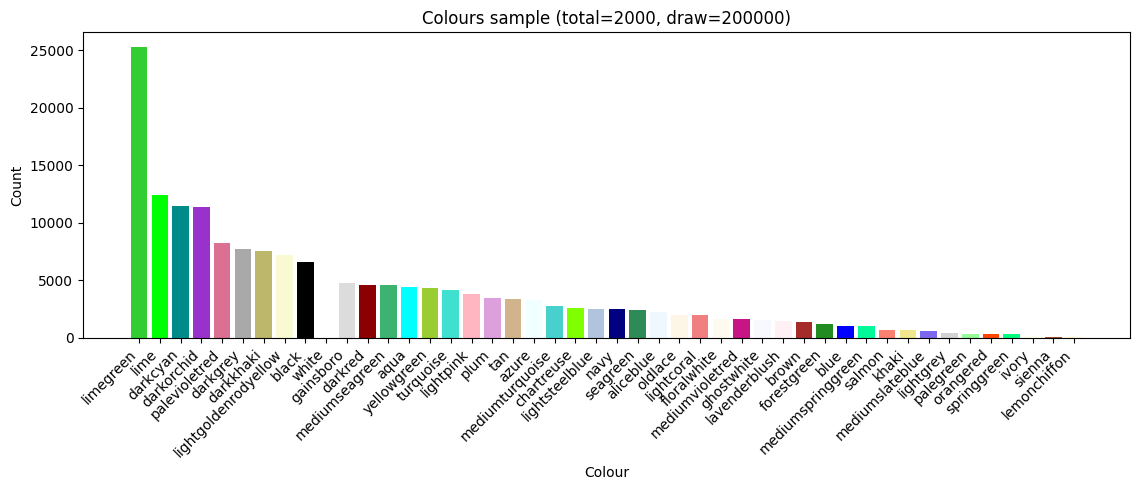

In [90]:
plot()

In [91]:
print(dist)

{'ivory': 2, 'palevioletred': 74, 'mediumturquoise': 25, 'lavenderblush': 14, 'azure': 31, 'plum': 32, 'mediumvioletred': 15, 'lightgoldenrodyellow': 65, 'mediumspringgreen': 9, 'salmon': 6, 'darkcyan': 104, 'brown': 13, 'white': 49, 'lime': 113, 'lightcoral': 18, 'chartreuse': 24, 'tan': 30, 'aliceblue': 20, 'springgreen': 3, 'orangered': 3, 'darkorchid': 103, 'yellowgreen': 39, 'aqua': 40, 'palegreen': 3, 'mediumseagreen': 42, 'limegreen': 233, 'ghostwhite': 14, 'oldlace': 18, 'darkkhaki': 68, 'lemonchiffon': 1, 'mediumslateblue': 5, 'floralwhite': 15, 'forestgreen': 11, 'lightgrey': 4, 'blue': 9, 'darkred': 42, 'khaki': 6, 'sienna': 1, 'gainsboro': 43, 'black': 61, 'turquoise': 36, 'lightsteelblue': 23, 'navy': 24, 'lightpink': 36, 'darkgrey': 70, 'seagreen': 22}


In [80]:
reset()

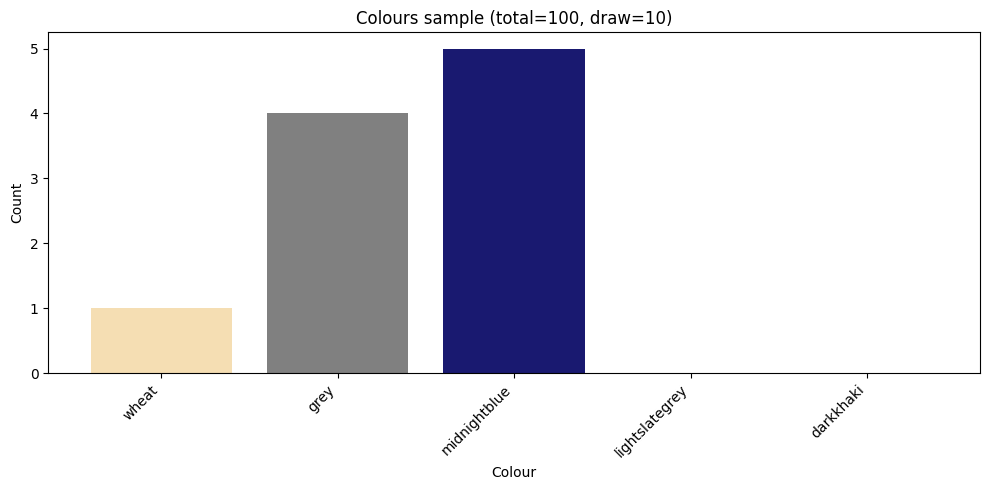